<img src = "./image/image.png" width=100% heigth=200px ><br>
# <center> Employee Attrition </center>

# Introduction<br>

In [2]:
# Importing libraries
import pandas as pd, numpy as np, seaborn as sns, plotly.express as px, xgboost as XGB, matplotlib.pyplot as plt,plotly.graph_objects as go, math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import norm, skew

In [12]:
# Plot Customization
plt.figure(figsize = (15,9))
plt.style.context('bmh')

<Figure size 1500x900 with 0 Axes>

In [13]:
# Loading dataset
df = pd.read_csv('data.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
print(f'The dataset has {df.shape[0]} rows for each employee and {df.shape[1]} attributes\n')

The dataset has 1470 rows for each employee and 35 attributes



In [15]:
# Dropping columns with little to no information
# Drop Columns with Missing Values
threshold = 0.9
df = df.dropna(thresh=threshold * len(df), axis=1)
print(df.shape)

(1470, 35)


In [16]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda col: encoder.fit_transform(col.astype(str)))

In [18]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

*JobLevel* doesn't have a description containing its values, so I'll leave them numeric, just as they've been originally collected.

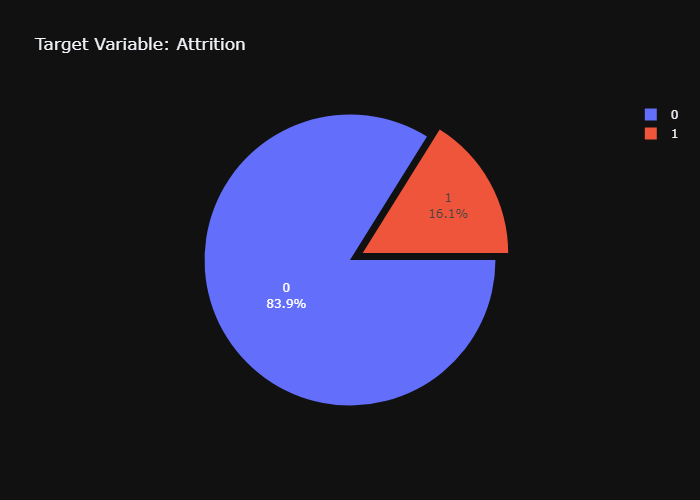

In [19]:
# Visualizing target variable classes and its distribution among the dataset
fig = px.pie(df, names = 'Attrition', title = 'Target Variable: Attrition', template = 'plotly_dark')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show('png')


PCA Feature Extraction With Variance


(1470, 3)


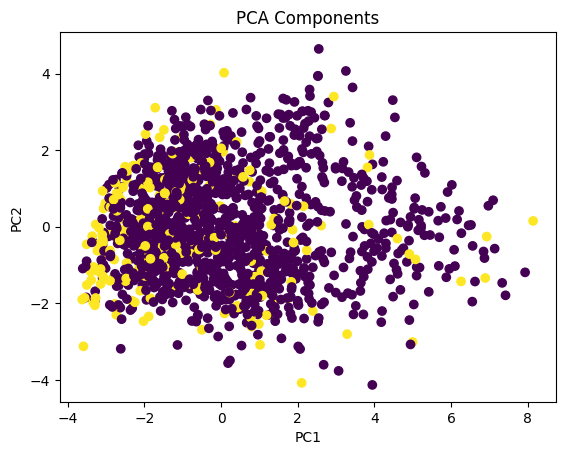

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df['Attrition']
X = df.drop('Attrition', axis=1)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Encoding categorical features for PCA
# Handle categorical variables appropriately
y = encoder.fit_transform(y)

# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_standardized)

# Creating a new DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Attrition'] = y
print(pca_df.shape)

# Accessing mean, covariance matrix, eigenvalues, and eigenvectors
mean_values = pca.mean_
covariance_matrix = pca.get_covariance()
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
eigenvectors = pca.components_

# Print or use the results as needed
# print("Mean Values:", mean_values)
# print("Covariance Matrix:\n", covariance_matrix)
# print("Explained Variance:", explained_variance)
# print("Explained Variance Ratio:", explained_variance_ratio)
# print("Eigenvectors:\n", eigenvectors)

# Visualizing the PCA components
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Attrition'], cmap='viridis')
plt.title('PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing and applying PCA on training set
X_train_standardized = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_standardized)

# Standardizing and applying PCA on testing set
X_test_standardized = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_standardized)

In [50]:
def show_confu(y_test_pred,model):
    # Create a confusion matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_test_pred) * 100 ))
    print('Precision: %.2f%%' % (precision_score(y_test, y_test_pred) * 100))
    print('Recall: %.2f%%' % (recall_score(y_test, y_test_pred) * 100))
    print('F1_Score: %.2f%%' % (f1_score(y_test, y_test_pred) * 100))
    confusion_matrix_model = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])

Mean-Shift

Accuracy: 86.17%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%


c:\Users\mjdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



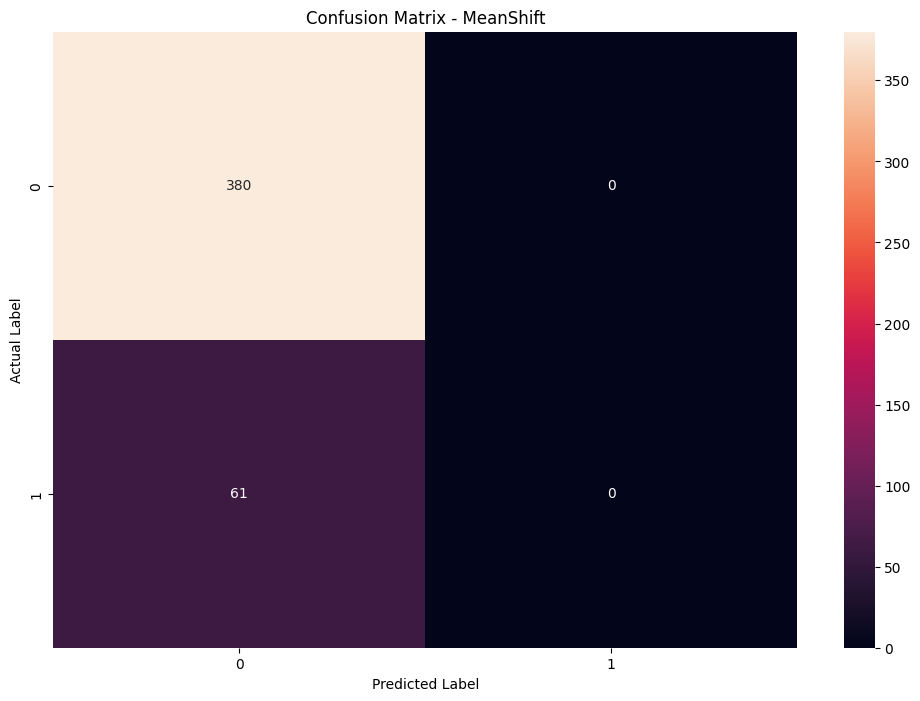

In [52]:
from sklearn.cluster import MeanShift
# Create a MeanShift classifier
mean_shift_classifier = MeanShift()

# Train the MeanShift classifier on the PCA-transformed features
mean_shift_classifier.fit(X_train_pca)

# Predictions on the test set
y_test_pred = mean_shift_classifier.predict(X_test_pca)

# Calculate accuracy for testing set (note: Mean Shift is not inherently a classification algorithm)
# You might use metrics like silhouette score or other clustering evaluation metrics instead of accuracy.
# This example demonstrates how to use Mean Shift; however, accuracy might not be the most suitable metric.
unique_labels = np.unique(y_test_pred)
num_clusters = len(unique_labels)
cluster_dict = {unique_labels[i]: i for i in range(num_clusters)}
mapped_labels = [cluster_dict[label] for label in y_test_pred]
show_confu(y_test_pred,'MeanShift')

Knn

Accuracy: 77.78%
Precision: 16.36%
Recall: 14.75%
F1_Score: 15.52%


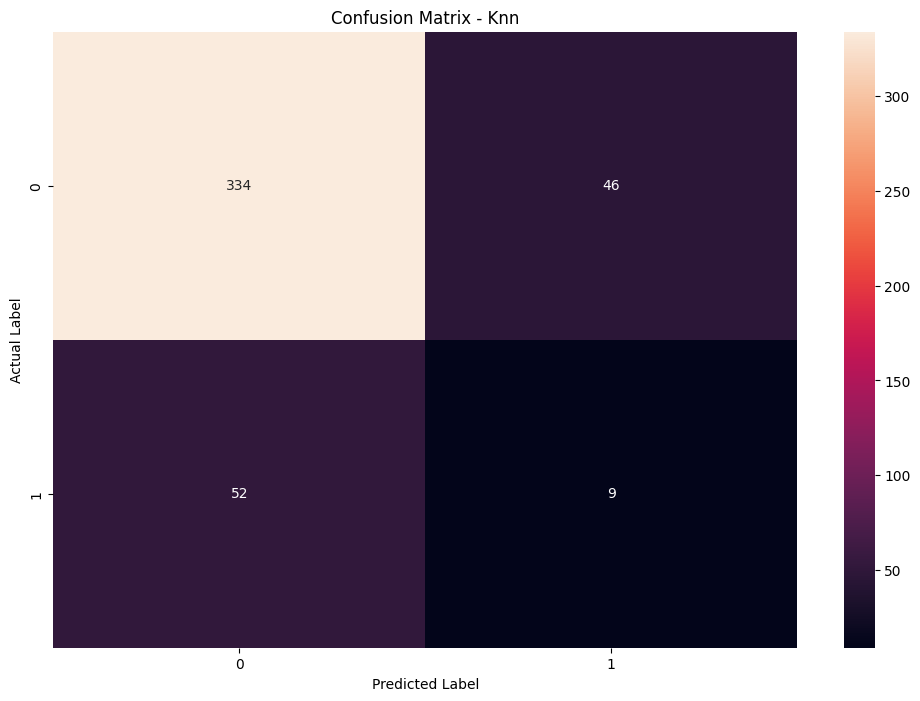

In [53]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the KNN classifier on the PCA-transformed features
knn_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_test_pred = knn_classifier.predict(X_test_pca)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Knn')

Svm

Accuracy: 86.17%
Precision: 0.00%
Recall: 0.00%
F1_Score: 0.00%


c:\Users\mjdar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



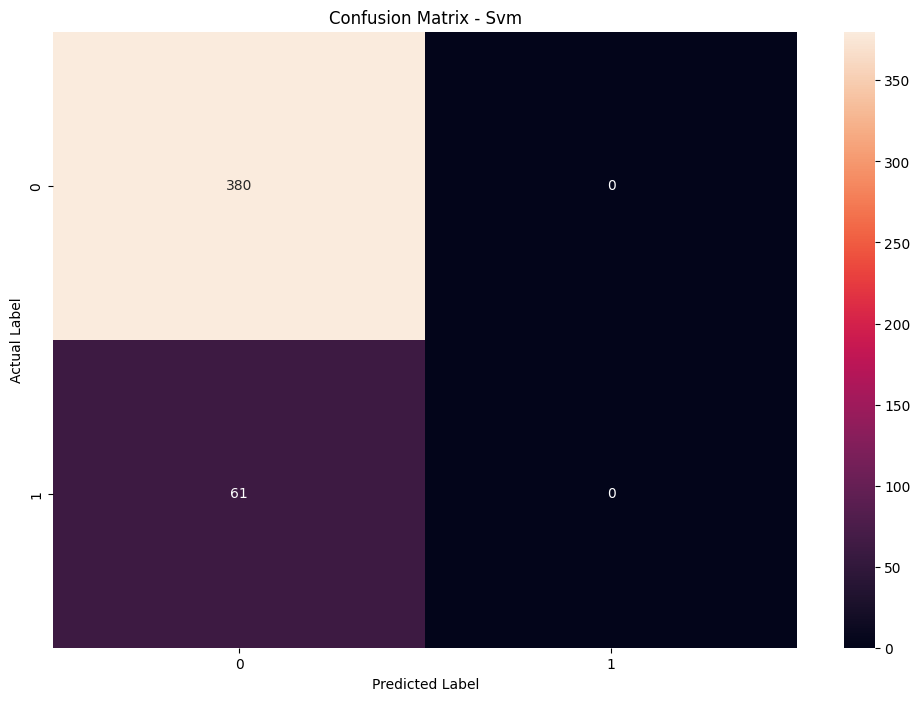

In [54]:
from sklearn.svm import SVC
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier on the PCA-transformed features
svm_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_test_pred = svm_classifier.predict(X_test_pca)

# Evaluate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
show_confu(y_test_pred,'Svm')

K Means

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


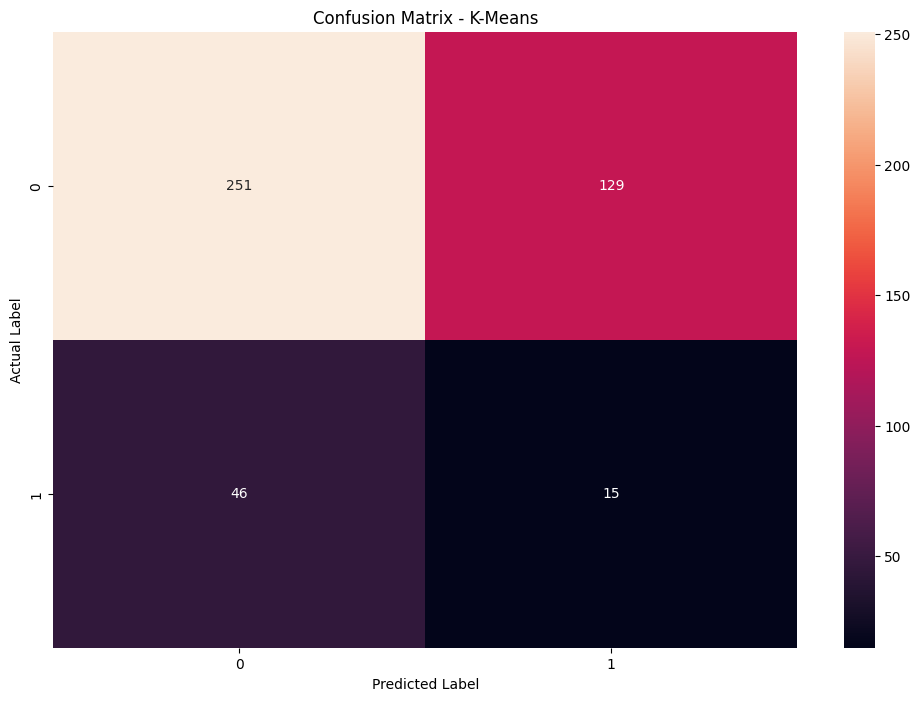

In [55]:
from sklearn.cluster import KMeans

# Applying KMeans on PCA components for training set
kmeans_train = KMeans(n_clusters=2, random_state=42,n_init=10)
y_train_pred = kmeans_train.fit_predict(X_train_pca)

# Applying KMeans on PCA components for testing set
y_test_pred = kmeans_train.predict(X_test_pca)

# Calculate accuracy for testing set
test_accuracy = accuracy_score(y_test, y_test_pred)

show_confu(y_test_pred,'K-Means')

Desion Tree

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


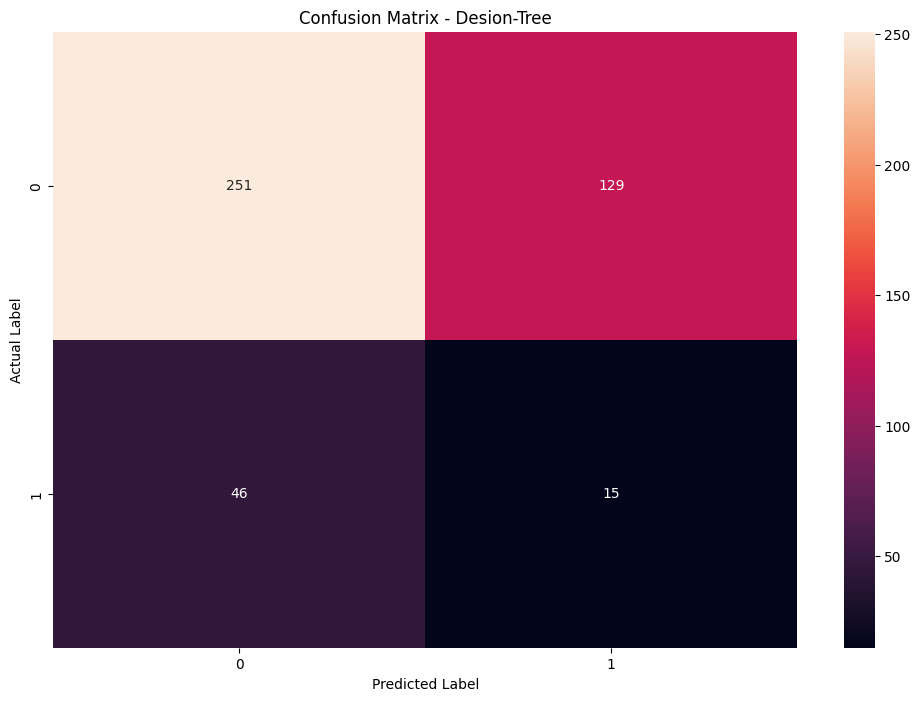

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the decision tree model on the PCA-transformed features
tree_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = tree_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_test_pred,'Desion-Tree')

XGBClassifier

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


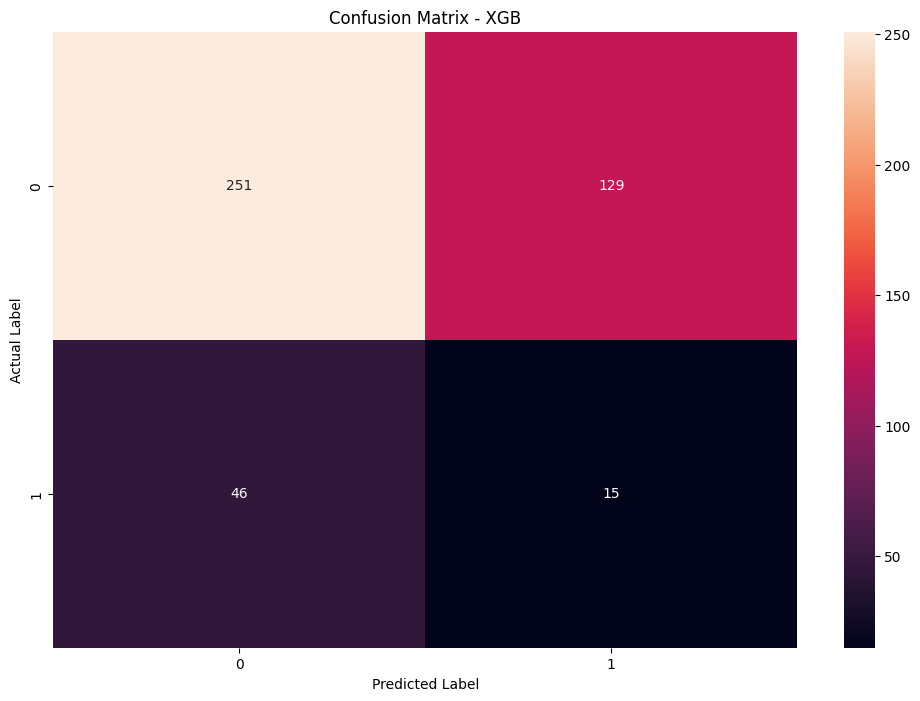

In [57]:
from xgboost import XGBClassifier
# Create an XGBClassifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the XGBClassifier model on the PCA-transformed features
xgb_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_test_pred,'XGB')

GradientBoostingClassifier

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


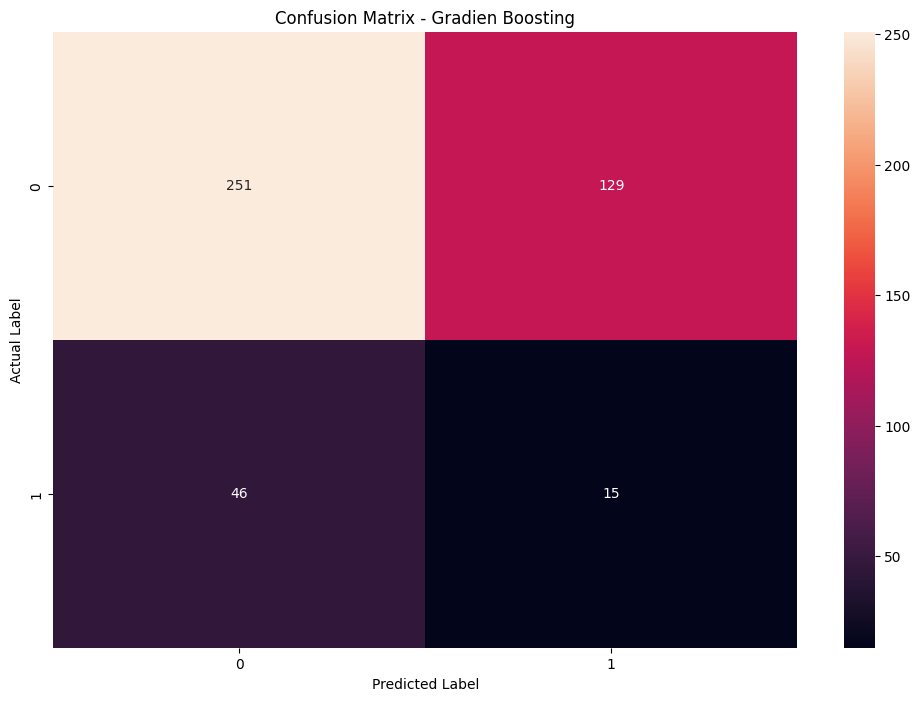

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
# Create a GradientBoostingClassifier
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the GradientBoostingClassifier model on the PCA-transformed features
gradient_boosting_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = gradient_boosting_classifier.predict(X_test_pca)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
show_confu(y_test_pred,'Gradien Boosting')

RandomForestClassifier

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


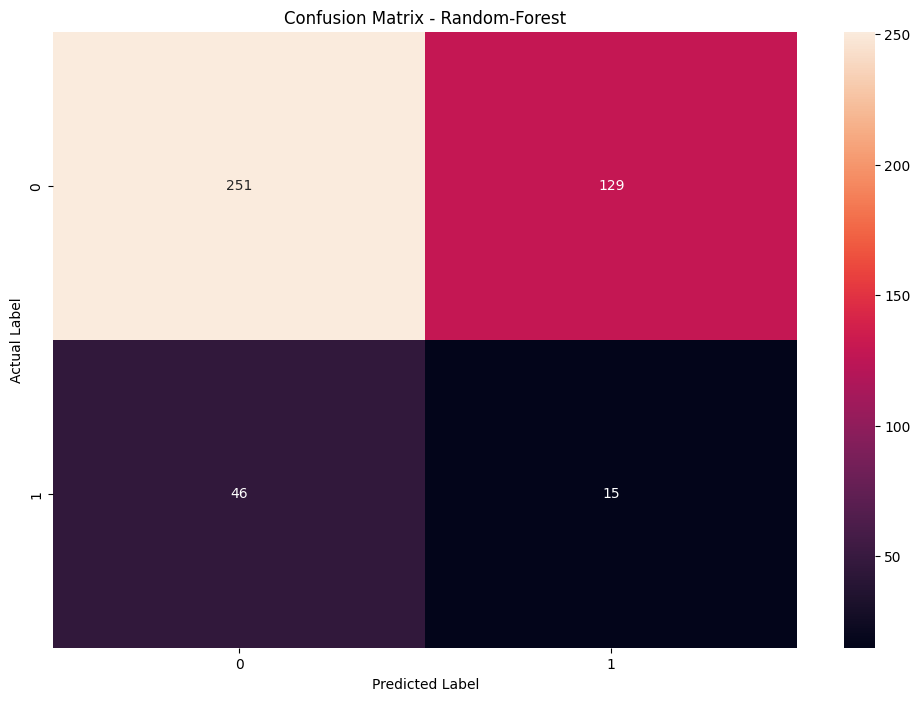

In [59]:
from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RandomForestClassifier model on the PCA-transformed features
random_forest_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = random_forest_classifier.predict(X_test_pca)

# Evaluate the accuracy
show_confu(y_test_pred,'Random-Forest')

AdaBoostClassifier

Accuracy: 60.32%
Precision: 10.42%
Recall: 24.59%
F1_Score: 14.63%


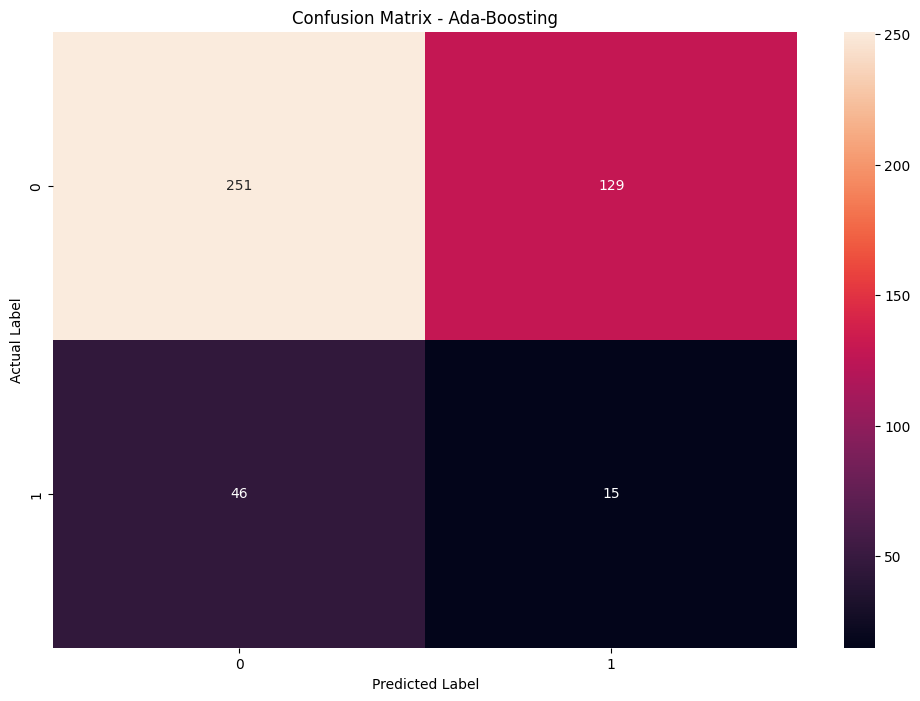

In [60]:
from sklearn.ensemble import AdaBoostClassifier
# Create an AdaBoostClassifier with a base estimator (e.g., Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)  # You can adjust the base classifier parameters
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Train the AdaBoostClassifier model on the PCA-transformed features
adaboost_classifier.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = adaboost_classifier.predict(X_test_pca)

show_confu(y_test_pred,'Ada-Boosting')